In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# create dataframe of dataset
df=pd.read_csv("Social_Network_Ads.csv")
df


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [3]:
x=df[["Age","EstimatedSalary"]]
y=df[["Purchased"]]
x
y

,Purchased
0,0
1,0
2,0
3,0
4,0
...,...
395,1
396,1
397,1
398,0


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

model=LogisticRegression()

In [5]:
# split data
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=25,test_size=0.25)

x_train

y_train

x_train.shape

y_train.shape


(300, 1)

In [6]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

model.fit(x_train,y_train)

model.score(x_test,y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.66

In [7]:
# scale data using Standard scaler
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss.fit(x_train)


StandardScaler()

In [8]:
x_train_scaled=ss.transform(x_train)

x_test_scaled=ss.transform(x_test)

In [9]:
# create Logistic Regression model
model_LR=LogisticRegression()

model_LR.fit(x_train_scaled,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [10]:
model_LR.score(x_test_scaled,y_test)

y_predict=model_LR.predict(x_test_scaled)

In [11]:
y_test

,Purchased
121,0
162,0
338,0
375,1
262,1
...,...
119,0
250,0
18,1
9,0


In [12]:
y_predict

array([0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0])

Text(0, 0.5, 'Salary')

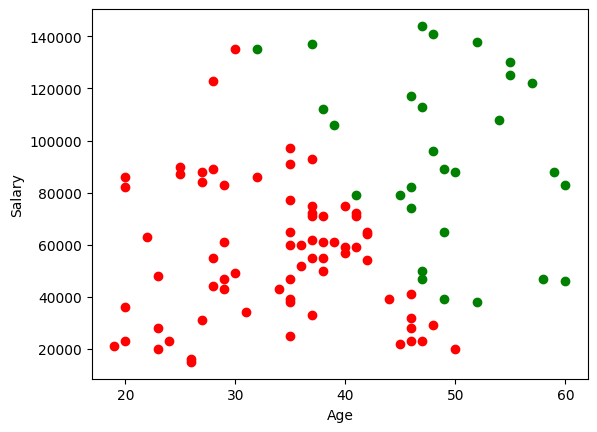

In [13]:
plt.scatter(x_test[y_predict==0]["Age"],x_test[y_predict==0]["EstimatedSalary"],c='r')
plt.scatter(x_test[y_predict==1]["Age"],x_test[y_predict==1]["EstimatedSalary"],c='g')
plt.xlabel('Age')
plt.ylabel('Salary')

In [14]:
x=df[["Age","EstimatedSalary"]]
y=df["Purchased"]

In [15]:
best_accuracy = 0
best_random_state = None

best_state_accuracy = {}

In [16]:
random_state_range = range(101)

In [17]:
for random_state in random_state_range:
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=random_state)
    model = LogisticRegression()
    model.fit(X_train, y_train)
    accuracy = model.score(X_test, y_test)

    best_state_accuracy[random_state] = accuracy

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_random_state = random_state

print("Best Random State:", best_random_state)
print("Best Accuracy:", best_accuracy)


Best Random State: 82
Best Accuracy: 0.875


In [18]:
for random_state, accuracy in best_state_accuracy.items():
    print(f"Random State {random_state}: Accuracy = {accuracy}")

Random State 0: Accuracy = 0.725
Random State 1: Accuracy = 0.6
Random State 2: Accuracy = 0.6
Random State 3: Accuracy = 0.6875
Random State 4: Accuracy = 0.7375
Random State 5: Accuracy = 0.6625
Random State 6: Accuracy = 0.65
Random State 7: Accuracy = 0.675
Random State 8: Accuracy = 0.675
Random State 9: Accuracy = 0.6
Random State 10: Accuracy = 0.65
Random State 11: Accuracy = 0.6625
Random State 12: Accuracy = 0.6
Random State 13: Accuracy = 0.7125
Random State 14: Accuracy = 0.6
Random State 15: Accuracy = 0.5625
Random State 16: Accuracy = 0.675
Random State 17: Accuracy = 0.7
Random State 18: Accuracy = 0.5875
Random State 19: Accuracy = 0.575
Random State 20: Accuracy = 0.5625
Random State 21: Accuracy = 0.7
Random State 22: Accuracy = 0.6375
Random State 23: Accuracy = 0.625
Random State 24: Accuracy = 0.65
Random State 25: Accuracy = 0.6625
Random State 26: Accuracy = 0.75
Random State 27: Accuracy = 0.675
Random State 28: Accuracy = 0.7
Random State 29: Accuracy = 0.6875

In [20]:
# drow confusion matrix
from sklearn import metrics
y_predict = model.predict(X_test)

cm = metrics.confusion_matrix(y_test, y_predict)
print(cm)

[[49  0]
 [31  0]]
